Nama Anggota kelompok

* Fadhil Firoos 121140142
* Harun Abdulkarim Khafid 121140147
* M Malik Agustian 121140148



#tentang datasets
Saluran reservasi hotel online telah secara dramatis mengubah kemungkinan pemesanan dan perilaku pelanggan. Sejumlah besar reservasi hotel dibatalkan karena pembatalan atau ketidakdatangan. Alasan umum pembatalan mencakup perubahan rencana, konflik penjadwalan, dll. Hal ini sering kali menjadi lebih mudah dengan pilihan untuk melakukannya secara gratis atau lebih disukai dengan biaya rendah yang bermanfaat bagi tamu hotel namun kurang diinginkan dan mungkin menghasilkan pendapatan. -Faktor yang semakin berkurang yang harus dihadapi oleh hotel.
**Dapatkah Anda memperkirakan apakah pelanggan akan melanjutkan reservasinya atau membatalkannya?**

dataset diperoleh dari [datasets hotel](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/data)

beberapa modul yang digunakan yaitu

* Pandas
* Numpy
* matplotlib
* plotly
* seaborn




# Import Library

In [58]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# import datasets

In [59]:
df=pd.read_csv('Hotel Reservations.csv')

validasi nilai null

In [60]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

transformasi status kolom ,1->Dibatalkan,0->Tidak Dibatalkan

In [61]:
df['status'] = np.where(df['booking_status']=='Canceled',1,0)

# Data Analisis

<ipython-input-81-6edb183c84a1>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



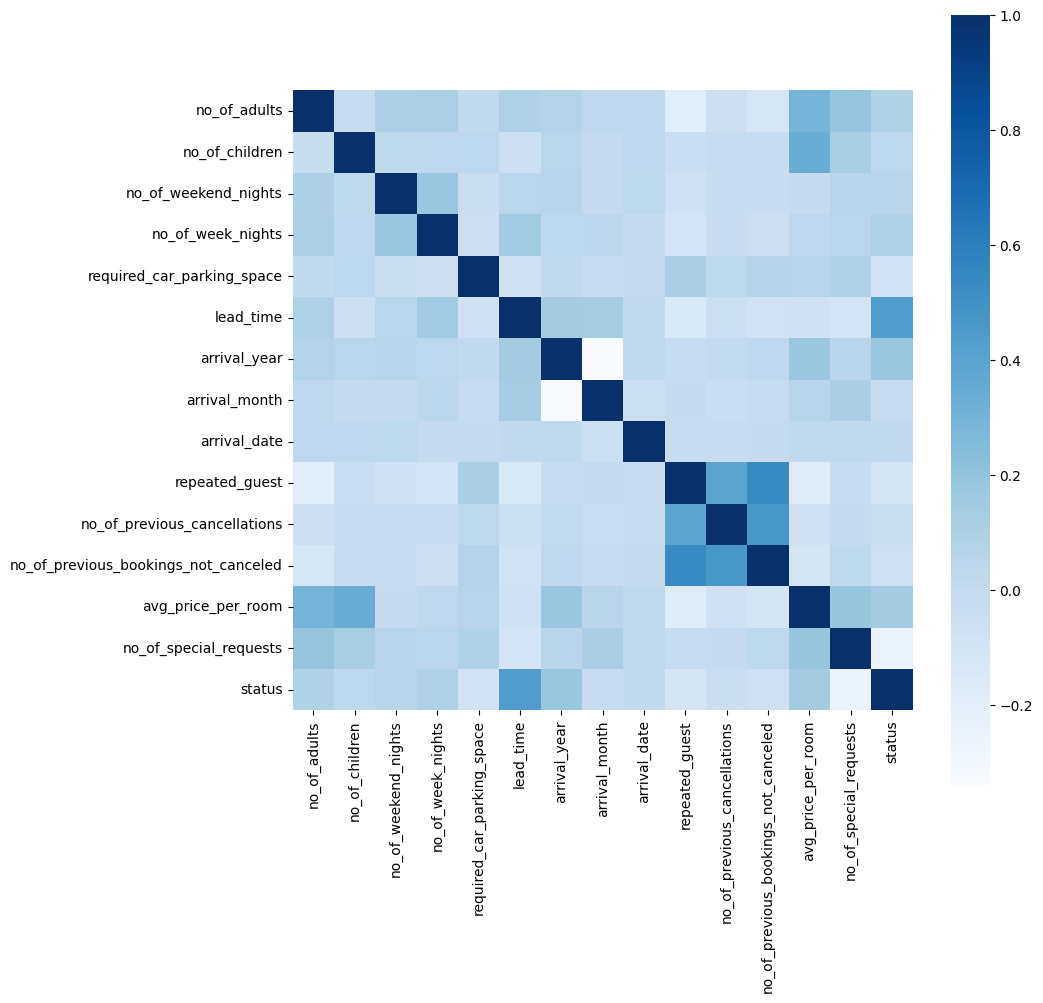

In [81]:
df1=df.corr()
#df1=df1[df1[0:]>0]
f = plt.figure(figsize=(10,10))
f = sns.heatmap(df1,square=True,cmap="Blues")

#Urutkan Atribut berdasarkan nilai korelasi

In [82]:
df1=df.corr()
df1['status'].sort_values(ascending=False)

<ipython-input-82-7f2ff6c50fae>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



status                                  1.000000
lead_time                               0.438538
arrival_year                            0.179529
avg_price_per_room                      0.142569
no_of_week_nights                       0.092996
no_of_adults                            0.086920
no_of_weekend_nights                    0.061563
no_of_children                          0.033078
arrival_date                            0.010629
arrival_month                          -0.011233
no_of_previous_cancellations           -0.033728
no_of_previous_bookings_not_canceled   -0.060179
required_car_parking_space             -0.086185
repeated_guest                         -0.107287
no_of_special_requests                 -0.253070
Name: status, dtype: float64

#tentang jenis makan

In [83]:
df1=df.groupby(['type_of_meal_plan','status'],as_index=False)['Booking_ID'].count()
df1['status']=df1['status'].astype(str)
fig = px.bar(df1,x='type_of_meal_plan',y='Booking_ID',text='Booking_ID',color='status',width=500,height=400)
fig.show()

#tentang permintaan spesial

In [84]:
df1=df.groupby(['no_of_special_requests','status'],as_index=False)['Booking_ID'].count()
df1['status']=df1['status'].astype(str)
fig = px.bar(df1,x='no_of_special_requests',y='Booking_ID',text='Booking_ID',color='status',width=700,height=400)
fig.show()

#segmen pasar

In [85]:
df1=df.groupby(['market_segment_type','status'],as_index=False)['Booking_ID'].count()
df1['status']=df1['status'].astype(str)
fig = px.bar(df1,x='market_segment_type',y='Booking_ID',text='Booking_ID',color='status',width=700,height=400)
fig.show()

#waktu tunggu

In [86]:
df1=df.groupby(['lead_time','status'],as_index=False)['Booking_ID'].count()
df1['status']=df1['status'].astype(str)
fig = px.bar(df1,x='lead_time',y='Booking_ID',text='Booking_ID',color='status',width=700,height=400)
fig.show()

#harga kamar
berdasarkan status, tipe, jumlah anak, jumlah hari, jumlah orang dewasa

In [87]:
df1=df.groupby('status',as_index=False)['avg_price_per_room'].mean()
#df1['status']=df1['status'].astype(str)
fig = px.bar(df1,x='status',y='avg_price_per_room',text='avg_price_per_room',width=700,height=400)
fig.show()

In [88]:
df1=df.groupby(['room_type_reserved','status'],as_index=False)['Booking_ID'].count()
df1['status']=df1['status'].astype(str)
fig = px.bar(df1,x='room_type_reserved',y='Booking_ID',text='Booking_ID',color='status',width=700,height=400)
fig.show()

In [89]:
df1=df.groupby(['no_of_children','status'],as_index=False)['Booking_ID'].count()
df1['status']=df1['status'].astype(str)
fig = px.bar(df1,x='no_of_children',y='Booking_ID',text='Booking_ID',color='status',width=700,height=400)
fig.show()

In [90]:
df1=df.groupby(['no_of_week_nights','status'],as_index=False)['Booking_ID'].count()
df1['status']=df1['status'].astype(str)
fig = px.bar(df1,x='no_of_week_nights',y='Booking_ID',text='Booking_ID',color='status',width=700,height=400)
fig.show()

In [91]:
df1=df.groupby(['no_of_adults','status'],as_index=False)['Booking_ID'].count()
df1['status']=df1['status'].astype(str)
fig = px.bar(df1,x='no_of_adults',y='Booking_ID',text='Booking_ID',color='status',width=700,height=400)
fig.show()

In [92]:
df1=df.groupby(['arrival_month','status'],as_index=False)['Booking_ID'].count()
df1['status']=df1['status'].astype(str)
fig = px.bar(df1,x='arrival_month',y='Booking_ID',text='Booking_ID',color='status',width=900,height=400)
fig.show()

In [93]:
df1=pd.get_dummies(df,columns=['type_of_meal_plan','room_type_reserved','market_segment_type'])

get x and y values for the model

In [94]:
#get x and y values for the model
x = df1[[
    'no_of_special_requests'
    ,'lead_time'
    ,'avg_price_per_room'
    ,'no_of_week_nights'
    ,'no_of_adults'
    ,'arrival_month'
    ,'room_type_reserved_Room_Type 1'
    ,'room_type_reserved_Room_Type 4'
    ,'type_of_meal_plan_Meal Plan 1'
    ,'market_segment_type_Online'
]].values
y=df1['status'].values

bagi data test dan data training

In [95]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((29020, 10), (7255, 10), (29020,), (7255,))

# klasifikasi decision tree

In [96]:
# import libraries and set model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

model = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
model.fit(x_train,y_train)

#Model Train accuracy
y_train_pred= model.predict(x_train)
accuracy_score(y_train,y_train_pred)

0.993039283252929

In [97]:
#Model Test accuracy
y_pred= model.predict(x_test)
accuracy_score(y_test,y_pred)

0.862026188835286

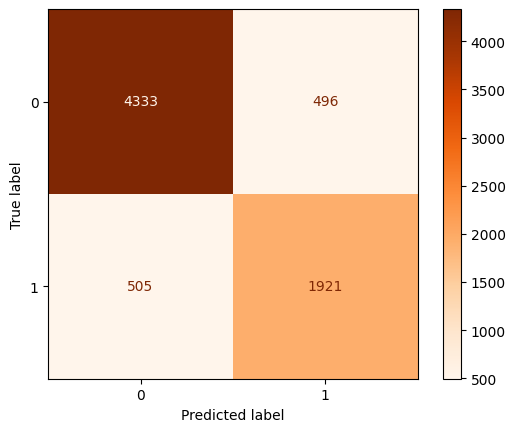

In [98]:
# Confusion Matrix
cm =confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='Oranges')

# fitur utama yang penting

In [99]:
features=df1[[
    'no_of_special_requests'
    ,'lead_time'
    ,'avg_price_per_room'
    ,'no_of_week_nights'
    ,'no_of_adults'
    ,'arrival_month'
    ,'room_type_reserved_Room_Type 1'
    ,'room_type_reserved_Room_Type 4'
    ,'type_of_meal_plan_Meal Plan 1'
    ,'market_segment_type_Online'
]].columns

In [100]:
a={'Feature':features,'peso':model.feature_importances_}
df1=pd.DataFrame(data=a)
df1=df1.sort_values(by='peso',ascending=False)
peso = (df1['peso']*100).round(0).astype(str)+'%'
px.bar(df1,x='Feature',y='peso',color='Feature',text=peso)

#Daftar Pustaka

[1] Kaggle, "Hotel Reservation Datasets" [Online]. Available: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/data
[Accesed 29 Oktober 2023]
